In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Load the Dataset
df = pd.read_csv('Dataset .csv')
print("Shape of Dataset:", df.shape)
df.head()

Shape of Dataset: (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [5]:
# Drop rows with too many missing values or fill them
df = df.dropna()  # or use df.fillna(method='ffill') for forward filling


In [8]:
print("\nData after dropping missing values:")
print(df.head())



Data after dropping missing values:
   Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
0        6317637             3742           162    73     8677       171   
1        6304287             3167           162    73     6047       592   
2        6300002             2892           162    75     4676       308   
3        6318506             4700           162    75     8682       860   
4        6314302             5515           162    75     8681       860   

   Locality Verbose   Longitude   Latitude  Cuisines  ...  Currency  \
0               172  121.027535  14.565443       920  ...         0   
1               600  121.014101  14.553708      1111  ...         0   
2               314  121.056831  14.581404      1671  ...         0   
3               873  121.056475  14.585318      1126  ...         0   
4               873  121.057508  14.584450      1122  ...         0   

   Has Table booking  Has Online delivery  Is delivering now  \
0              

In [9]:
print("\nData types after encoding:\n", df.dtypes)



Data types after encoding:
 Restaurant ID             int64
Restaurant Name           int32
Country Code              int64
City                      int32
Address                   int32
Locality                  int32
Locality Verbose          int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Switch to order menu      int32
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
dtype: object


In [10]:
print("\nFeatures (X):")
print(X.head())



Features (X):
   Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
0        6317637             3742           162    73     8677       171   
1        6304287             3167           162    73     6047       592   
2        6300002             2892           162    75     4676       308   
3        6318506             4700           162    75     8682       860   
4        6314302             5515           162    75     8681       860   

   Locality Verbose   Longitude   Latitude  Average Cost for two  Currency  \
0               172  121.027535  14.565443                  1100         0   
1               600  121.014101  14.553708                  1200         0   
2               314  121.056831  14.581404                  4000         0   
3               873  121.056475  14.585318                  1500         0   
4               873  121.057508  14.584450                  1500         0   

   Has Table booking  Has Online delivery  Is delivering no

In [11]:
print("\nTarget (y):")
print(y.head())



Target (y):
0     920
1    1111
2    1671
3    1126
4    1122
Name: Cuisines, dtype: int32


In [13]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [14]:

X = df.drop('Cuisines', axis=1)  # Replace 'Cuisines' with the actual target column name
y = df['Cuisines']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
print("\nTraining features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)



Training features shape: (7633, 20)
Testing features shape: (1909, 20)
Training target shape: (7633,)
Testing target shape: (1909,)


In [17]:

print("\nFeatures (X):\n", X.head())
print("\nTarget (y):\n", y.head())
print("\nTrain/Test split shapes:")
print("X_train:", X_train.shape, "| X_test:", X_test.shape)
print("y_train:", y_train.shape, "| y_test:", y_test.shape)



Features (X):
    Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
0        6317637             3742           162    73     8677       171   
1        6304287             3167           162    73     6047       592   
2        6300002             2892           162    75     4676       308   
3        6318506             4700           162    75     8682       860   
4        6314302             5515           162    75     8681       860   

   Locality Verbose   Longitude   Latitude  Average Cost for two  Currency  \
0               172  121.027535  14.565443                  1100         0   
1               600  121.014101  14.553708                  1200         0   
2               314  121.056831  14.581404                  4000         0   
3               873  121.056475  14.585318                  1500         0   
4               873  121.057508  14.584450                  1500         0   

   Has Table booking  Has Online delivery  Is delivering n

In [18]:
# Step 6: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
# Step 7: Predictions and Evaluation
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.17234154007333682

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         2
          31       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         0
          41       0

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

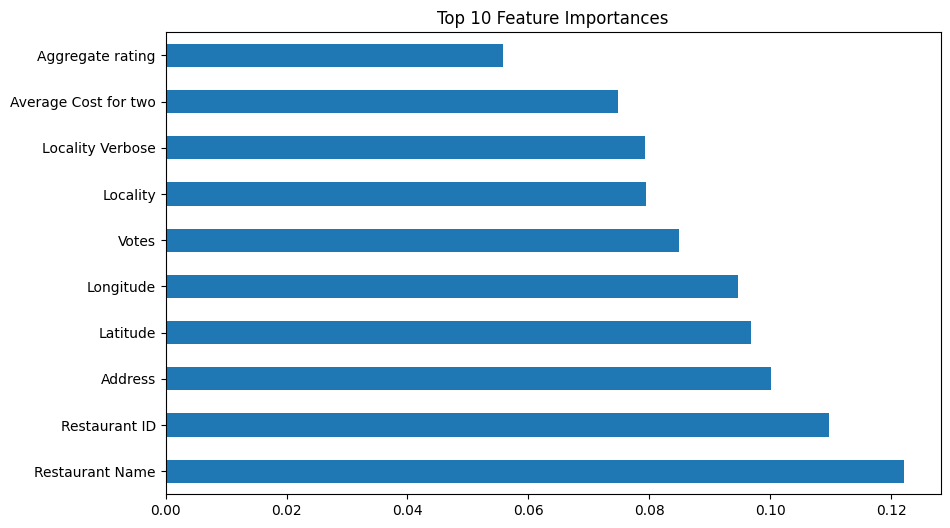

In [20]:
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

In [21]:
print("----- Summary of Model Performance -----")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Top 5 Most Important Features:")
print(feat_importances.nlargest(5))


----- Summary of Model Performance -----
Accuracy: 0.17
Top 5 Most Important Features:
Restaurant Name    0.122071
Restaurant ID      0.109649
Address            0.100164
Latitude           0.096872
Longitude          0.094618
dtype: float64
